In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import  python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

In [ ]:
# import the data set for the past transactions that has taken place
df = pd.read_csv('/content/drive/MyDrive/Personal Projects/credit card fraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (284807, 31)


In [ ]:
# How many fraud (1) vs non-fraud (0) transactions?
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

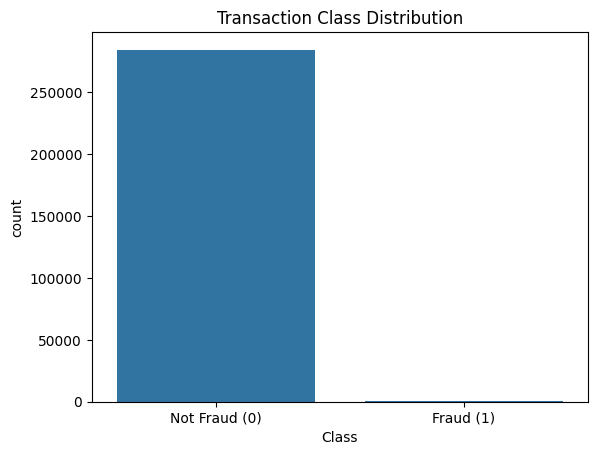

In [ ]:
# visualizing the transaction class distribution

sns.countplot(x='Class', data=df)
plt.title("Transaction Class Distribution")
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

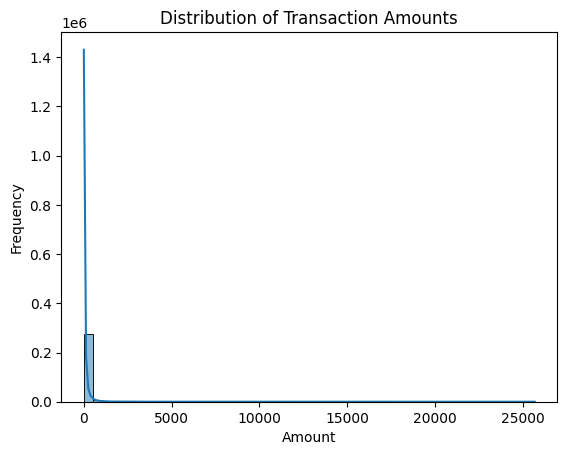

In [ ]:
# Transaction ammount distribution

sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

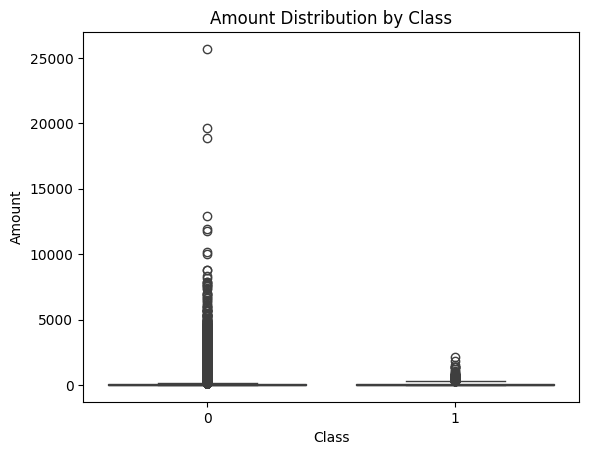

In [ ]:
# the distribution between the ammount and class
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount Distribution by Class")
plt.show()

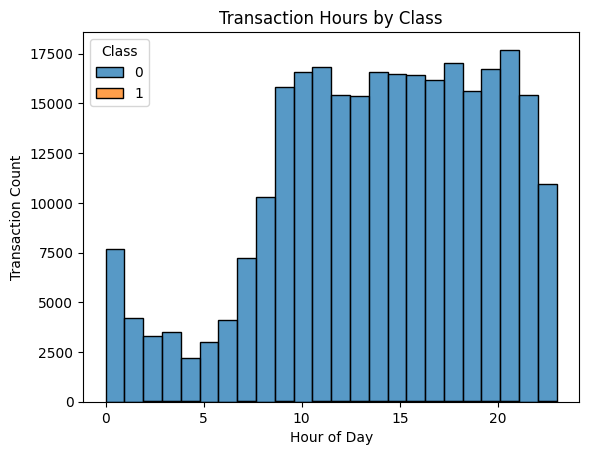

In [ ]:
# create hour feature and see the relationship between the hour of the day and class
df['Hour'] = (df['Time'] // 3600) % 24

sns.histplot(data=df, x='Hour', hue='Class', bins=24, multiple='stack')
plt.title("Transaction Hours by Class")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show();


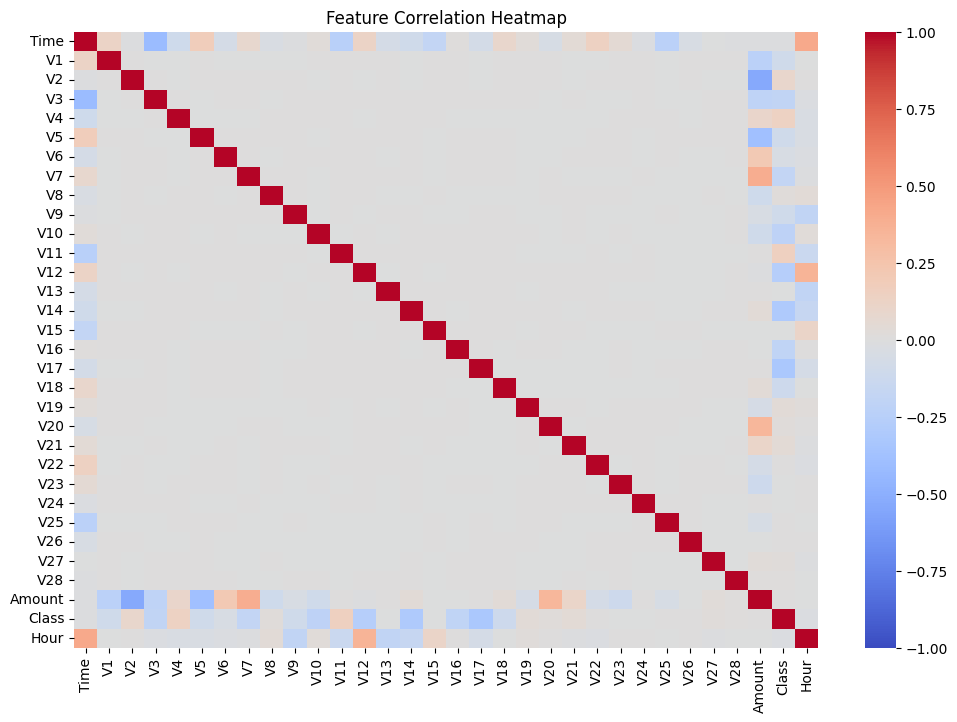

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

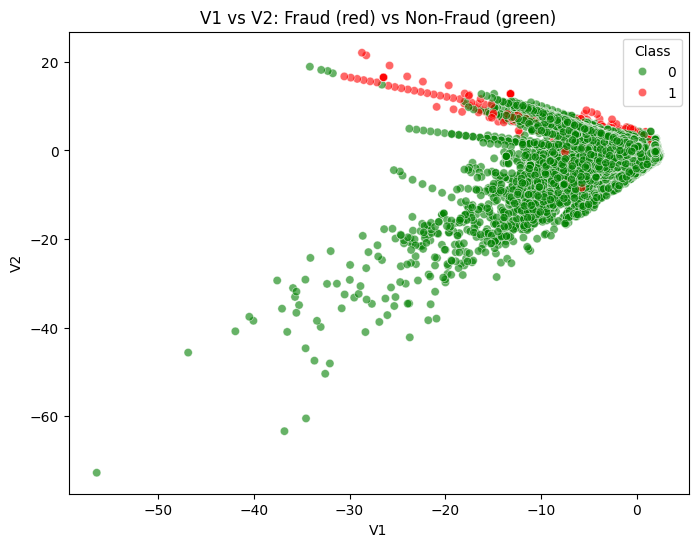

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='V1', y='V2', hue='Class', palette=['green', 'red'], alpha=0.6)
plt.title('V1 vs V2: Fraud (red) vs Non-Fraud (green)')
plt.show()

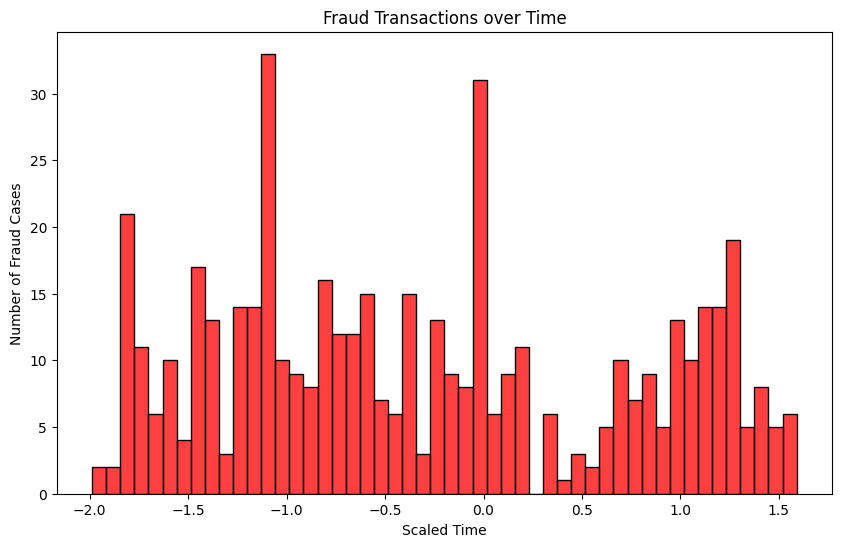

In [ ]:
from sklearn.preprocessing import StandardScaler

# If Time is still present
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

plt.figure(figsize=(10,6))
frauds = df[df['Class'] == 1]
sns.histplot(frauds['scaled_time'], bins=50, kde=False, color='red')
plt.title('Fraud Transactions over Time')
plt.xlabel('Scaled Time')
plt.ylabel('Number of Fraud Cases')
plt.show()

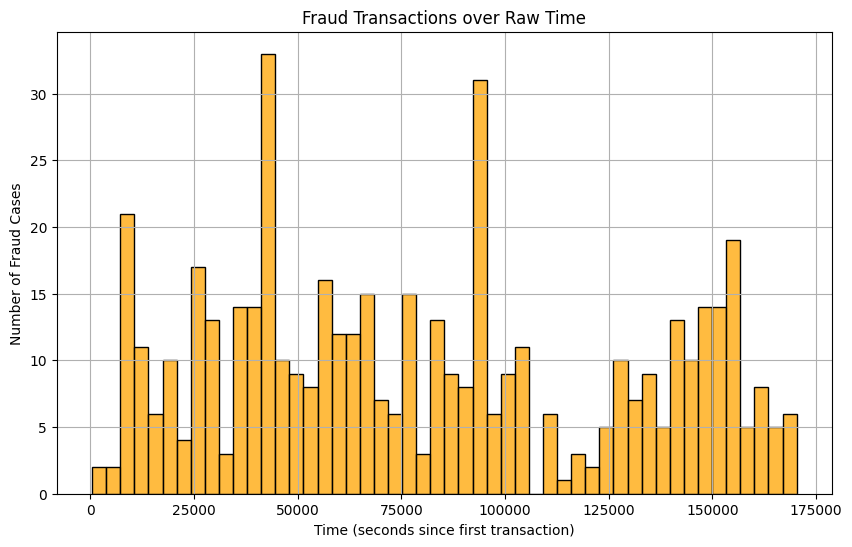

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(frauds['Time'], bins=50, color='orange')
plt.title('Fraud Transactions over Raw Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Number of Fraud Cases')
plt.grid()
plt.show()

In [ ]:
# spliting the feature and the terget.
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps class distribution
)


In [ ]:
print("Training Set Class Distribution:\n", y_train.value_counts())
print("\nTest Set Class Distribution:\n", y_test.value_counts())

Training Set Class Distribution:
 Class
0    227451
1       394
Name: count, dtype: int64

Test Set Class Distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


In [ ]:
# Logistic Regression with class balancing
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))
print("ROC AUC Score:", roc_auc_score(y_test, lr_proba))


Logistic Regression Results
Confusion Matrix:
 [[55304  1560]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC AUC Score: 0.9736291674801603


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with class balancing
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nRandom Forest Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_proba))



Random Forest Results
Confusion Matrix:
 [[56861     3]
 [   25    73]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9580958649638808


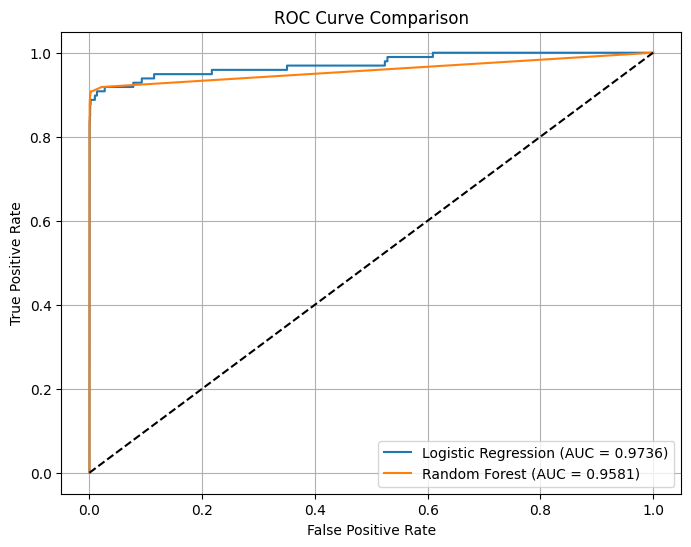

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC curve points
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_proba):.4f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:39:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Results
Confusion Matrix:
 [[56856     8]
 [   18    80]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9768195580145396


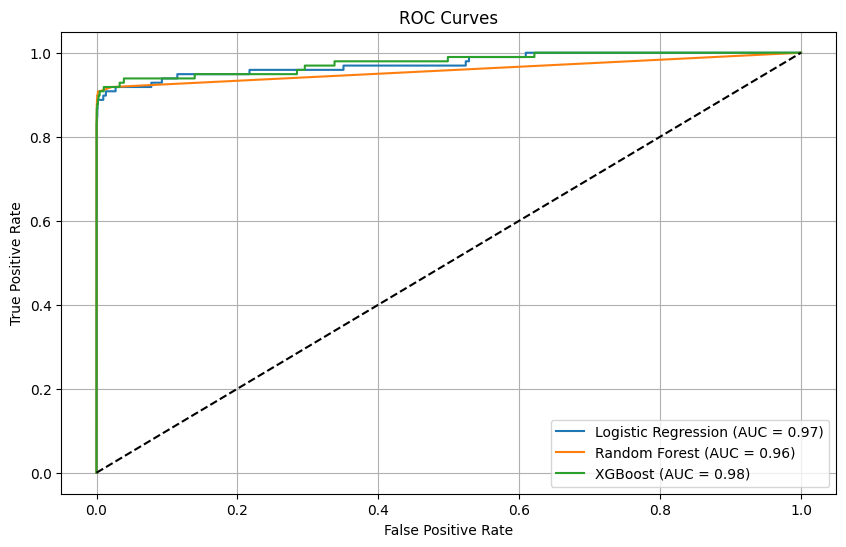

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities
# Changed variable name from log_model to lr
y_proba_log = lr.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# AUC Scores
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(xgb_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']

In [ ]:
model = joblib.load('fraud_detection_model.pkl')

In [ ]:
def predict_fraud(time, v1, v2, v3, amount):
    # Put input into array
    input_data = np.array([[time, v1, v2, v3, amount]])  # Add more if needed
    prediction = model.predict(input_data)
    return "⚠️ Fraud Detected!" if prediction[0] == 1 else "✅ Transaction is Legit"


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Time"),
        gr.Number(label="V1"),
        gr.Number(label="V2"),
        gr.Number(label="V3"),
        gr.Number(label="Amount")
    ],
    outputs="text",
    title="💳 Fraud Detection System",
    description="Enter transaction details to check if it's fraudulent."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5f814c61d6132c572e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
